<a href="https://colab.research.google.com/github/aryaar04/hotel-camera-detection-using-webcam/blob/main/hotel_camera_detection_using_webcam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Title: Hidden Camera Detection in Hotel Rooms using YOLOv5 and Webcam

Cloning into 'yolov5'...
remote: Enumerating objects: 17410, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 17410 (delta 63), reused 22 (delta 22), pack-reused 17326 (from 3)
Receiving objects: 100% (17410/17410), 16.29 MiB | 25.12 MiB/s, done.
Resolving deltas: 100% (11928/11928), done.
/content/yolov5/yolov5/yolov5


<IPython.core.display.Javascript object>

detect: weights=['yolov5s.pt'], source=webcam_photo.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CPU

100% 14.1M/14.1M [00:00<00:00, 408MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/1 /content/yolov5/yolov5/yolov5/webcam_photo.jpg: 480x640 1 person, 1 cell phone, 342.6ms
Speed: 2.7ms pre-process, 342.6ms inference, 4.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


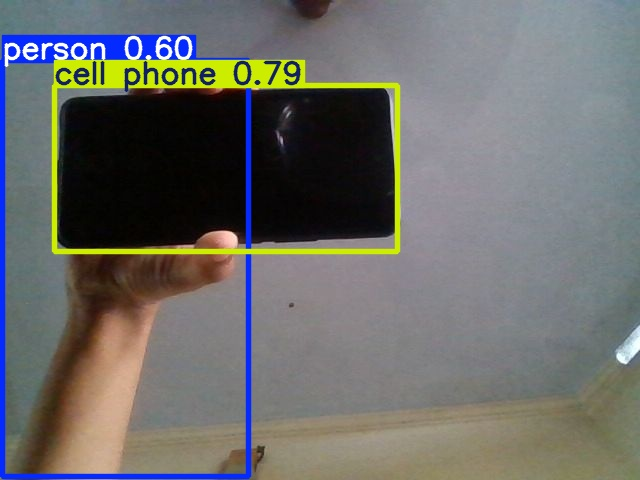

In [ ]:
# Step 1: Clone YOLOv5 and install dependencies
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

# Step 2: Capture a webcam frame using JavaScript (Colab workaround)
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
import PIL.Image
import io

def capture_webcam_image():
    js = Javascript('''
    async function takePhoto() {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = '📸 Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        div.appendChild(video);
        document.body.appendChild(div);

        const stream = await navigator.mediaDevices.getUserMedia({ video: true });
        video.srcObject = stream;
        await video.play();

        // Resize video
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getTracks().forEach(track => track.stop());
        div.remove();

        return canvas.toDataURL('image/jpeg', 0.8);
    }
    takePhoto();
    ''')
    display(js)
    data = eval_js("takePhoto()")
    binary = b64decode(data.split(',')[1])
    image = PIL.Image.open(io.BytesIO(binary))
    return cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# Step 3: Take a photo and save it
img = capture_webcam_image()
cv2.imwrite("webcam_photo.jpg", img)

# Step 4: Run YOLOv5 detection on the captured photo
!python detect.py --weights yolov5s.pt --img 640 --conf 0.3 --source webcam_photo.jpg

# Step 5: Display detection result
from IPython.display import Image, display
import glob

output_images = glob.glob('runs/detect/exp*/webcam_photo.jpg')
for img_path in output_images:
    display(Image(img_path))
